In [18]:
# update path to file here
file_path = '../LSP_LCDVeekMT2_anim/testbenchResults/testbenchLCDanim.txt'

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
images = []

with open(file_path, 'r') as f:
    # each new image/frame starts with ##=0,0
    # three state machine 
    #    state a) line starts with # and thus is a comment or is used for navigation (so ignore this line)
    #          b) line starts with *n , where n is an integer -> multiply last result n times (note - should always come after state c) )
    #          c) line is a 24bit number
    
    
    current_rgb = np.zeros((1,3),dtype=np.uint8)
    
    current_image = np.empty((1024*525,3),dtype=np.uint8)
    
    idx = 0
    for line in f:
        if line == "##=0,0\n" and idx > 0: #frame separation
            images.append(current_image)
            current_image = np.empty_like(current_image)
            idx = 0
            continue
            
        if line[0] == '#' or line[0] == '\n':
            continue
        elif line[0] == '*':
            times = int(line[1:])
            
            for i in range(times):
                current_image[idx] = current_rgb
                idx+=1
            
        else:
            line_uint = int(line) & 0xffffff
            current_rgb[0,0] = (line_uint & 0xff0000) >> 16
            current_rgb[0,1] = (line_uint & 0x00ff00) >> 8
            current_rgb[0,2] = line_uint & 0x0000ff 
            
            current_image[idx] = current_rgb
            idx+=1
            

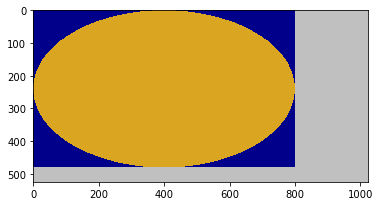

In [21]:
plt.imshow(images[0].reshape((525,1024,3)))

In [22]:
#output gif
from PIL import Image
pill_images = []

for im in images:
    pill_images.append(Image.fromarray(im.reshape((525,1024,3))))


pill_images[0].save("out.gif", save_all=True, append_images=pill_images[1:], duration=100, loop=0)

In [23]:
# see the gif
gif = Image.open("out.gif")
gif.show()